In [5]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [54]:
#keModel = Sequential()
#keModel.add(LSTM(1024, return_sequences=False,
#                input_shape=(nFramesNorm, nFeatureLength),
#                dropout=0.5))
#keModel.add(Dense(256, activation='relu'))
#keModel.add(Dropout(0.5))
#keModel.add(Dense(oFeatureTrain.nLabels, activation='softmax'))
#optimizer = Adam(lr=1e-5, decay=1e-6)
#keModel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [55]:
sLog1 = "log/20180523-0542-lstm-35878in249.acc"
dfLog1 = pd.read_csv(sLog1)
print("%3d epochs in %s" % (len(dfLog1), sLog1))

sLog2 = "log/20180523-2044-lstm-35878in249.acc"
dfLog2 = pd.read_csv(sLog2)
print("%3d epochs in %s" % (len(dfLog2), sLog2))

sLog3 = "log/20180523-2151-lstm-35878in249.acc"
dfLog3 = pd.read_csv(sLog3)
print("%3d epochs in %s" % (len(dfLog3), sLog3))

dfLog = pd.concat((dfLog1, dfLog2, dfLog3)).reset_index(drop=True)
dfLog.tail()
print("%3d epochs in total" % len(dfLog))

141 epochs in log/20180523-0542-lstm-35878in249.acc
 10 epochs in log/20180523-2044-lstm-35878in249.acc
100 epochs in log/20180523-2151-lstm-35878in249.acc
251 epochs in total


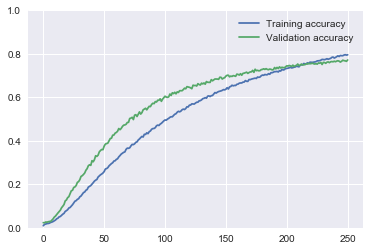

In [56]:
plt.plot(dfLog.acc, label="Training accuracy")
plt.plot(dfLog.val_acc, label="Validation accuracy")

plt.ylim((0,1))
plt.legend()
plt.show()

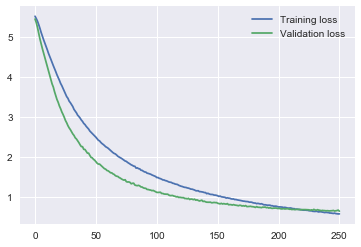

In [57]:
plt.plot(dfLog.loss, label="Training loss")
plt.plot(dfLog.val_loss, label="Validation loss")

plt.legend()
plt.show()

In [58]:
dfLog.tail()

,epoch,acc,loss,val_acc,val_loss
246,95,0.791535,0.589972,0.770807,0.642584
247,96,0.794426,0.578375,0.768716,0.648432
248,97,0.796029,0.574423,0.767740,0.653815
249,98,0.794287,0.570203,0.765649,0.665147
250,99,0.795471,0.571030,0.771783,0.638742


In [3]:
sLogDir = "log"
ylim_loss = (0.0,5.0)
def acc_loss_show(sLogFile, sDescription, nEpoch = 250):
    print(sDescription)
    
    dfLog = pd.read_csv(sLogDir + "/" + sLogFile)
    print("Validation set: max accuracy %.2f | min loss %.3f" % (dfLog.val_acc.max(), dfLog.val_loss.min()))
    print("\n", dfLog.tail())
    
    plt.plot(dfLog.epoch, dfLog.acc, label="Training accuracy")
    plt.plot(dfLog.epoch, dfLog.val_acc, label="Validation accuracy")

    plt.xlim((0,nEpoch))
    plt.ylim((0,1))
    plt.legend()
    plt.show()
    
    plt.plot(dfLog.epoch, dfLog.loss, label="Training loss")
    plt.plot(dfLog.epoch, dfLog.val_loss, label="Validation loss")

    plt.xlim((0,nEpoch))
    plt.ylim(ylim_loss)
    plt.legend()
    plt.show()
    
    return

### Try stacked LSTM

In [7]:
#keModel = Sequential()
#keModel.add(LSTM(1024, return_sequences=True,
#                input_shape=(nFramesNorm, nFeatureLength),
#                dropout=0.5))
#keModel.add(LSTM(1024, return_sequences=False, dropout=0.5))
#keModel.add(Dense(oFeatureTrain.nLabels, activation='softmax'))

2 LSTM, batchsize = 256, lr=1e-3
Validation set: max accuracy 0.74 | min loss 0.806

     epoch       acc      loss   val_acc  val_loss
95     95  0.855252  0.409725  0.728844  0.845626
96     96  0.854450  0.412413  0.728705  0.848816
97     97  0.855217  0.412078  0.735954  0.829239
98     98  0.860721  0.397009  0.737348  0.823349
99     99  0.857864  0.401562  0.735536  0.832614


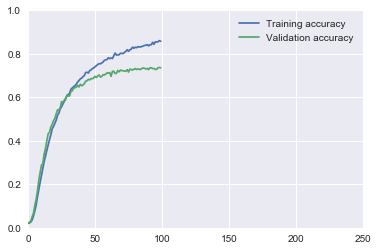

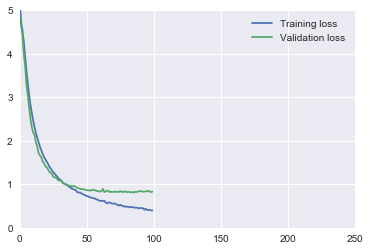

In [15]:
acc_loss_show("20180525-1033-lstm-35878in249.acc",
    "2 LSTM, batchsize = 256, lr=1e-3", 250)